In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline


In [2]:
df= pd.read_csv('movies.csv')

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# now we need to find out if there is any missing data

In [5]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [6]:
df3= df['gross'].dropna()

In [7]:
# we will correlate data to calculate factors affecting the gross revenue of the movie
#first need to remove the null values her


In [8]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [9]:
df2= df.dropna(subset=['gross','budget','company','votes'])

In [10]:
df2.isnull().sum()

name         0
rating      12
genre        0
year         0
released     0
score        0
votes        0
director     0
writer       0
star         0
country      1
budget       0
gross        0
company      0
runtime      1
dtype: int64

In [11]:
df2= df2.fillna({'rating':'None',
           'country':'None'})

In [12]:
df2=df2.fillna(value=df['runtime'].mean()) #instead of filling 0 in null runtime we replaced it with mean of runtime 

In [13]:
df2.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [14]:
#now our data is cleaned now drop duplicates
df3= df2.drop_duplicates()


In [15]:
df.sort_values(by=['gross'], ascending= False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


Text(0, 0.5, 'gross earning')

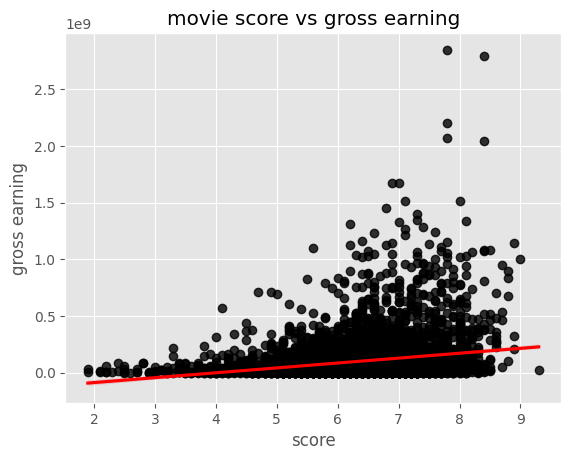

In [16]:
#checking correlation between score and gross earning
sns.regplot(x= "score", y= "gross", data= df3 ,scatter_kws={"color":"black"}, line_kws={"color" : "red"})
plt.title("movie score vs gross earning")
plt.xlabel("score")
plt.ylabel("gross earning")

In [17]:
df3.corr(method= 'pearson')

C:\Users\anshu\AppData\Local\Temp\ipykernel_5412\1969815357.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3.corr(method= 'pearson')


,year,score,votes,budget,gross,runtime
year,1.000000,0.054837,0.205524,0.327531,0.274101,0.074091
score,0.054837,1.000000,0.473738,0.071609,0.222034,0.414463
votes,0.205524,0.473738,1.000000,0.439925,0.614858,0.352406
budget,0.327531,0.071609,0.439925,1.000000,0.740364,0.318571
gross,0.274101,0.222034,0.614858,0.740364,1.000000,0.275562
runtime,0.074091,0.414463,0.352406,0.318571,0.275562,1.000000


In [18]:
df2.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [19]:
#here we can see gross earning is correlated with budget now if we see if there any other factor like company for high gross earning
# but we cant corelate a object so we will categorised each type of object with numerical value then will draw a heat map
df_numeric= df3
for col_name in df_numeric.columns:
    if (df_numeric[col_name].dtype== 'object'):
        df_numeric[col_name]= df_numeric[col_name].astype('category')
        df_numeric[col_name]= df_numeric[col_name].cat.codes
df_numeric
    

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4704,7,6,1980,1308,8.4,927000.0,1798,2840,700,47,19000000.0,46998772.0,1432,146.0
1,3941,7,1,1980,1131,5.8,65000.0,1580,1159,215,48,4500000.0,58853106.0,454,104.0
2,3653,5,0,1980,1363,8.7,1200000.0,759,1821,1161,48,18000000.0,538375067.0,949,124.0
3,205,5,4,1980,1131,7.7,221000.0,891,1415,1478,48,3500000.0,83453539.0,1114,88.0
4,734,7,4,1980,1174,7.3,108000.0,721,351,272,48,6000000.0,39846344.0,1089,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,416,7,0,2020,907,6.6,140000.0,17,2396,1819,48,90000000.0,426505244.0,454,124.0
7649,3568,5,0,2020,715,6.5,102000.0,854,2315,148,48,85000000.0,319715683.0,1114,99.0
7650,1156,5,1,2020,907,5.6,53000.0,1812,2835,1474,48,175000000.0,245487753.0,1403,101.0
7651,3990,5,1,2020,760,6.8,42000.0,296,2095,641,6,135000000.0,111105497.0,12,100.0


In [20]:

plt.figure(figsize=(12,8)) # we have to give size before creating figure

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'correlation heatmap')

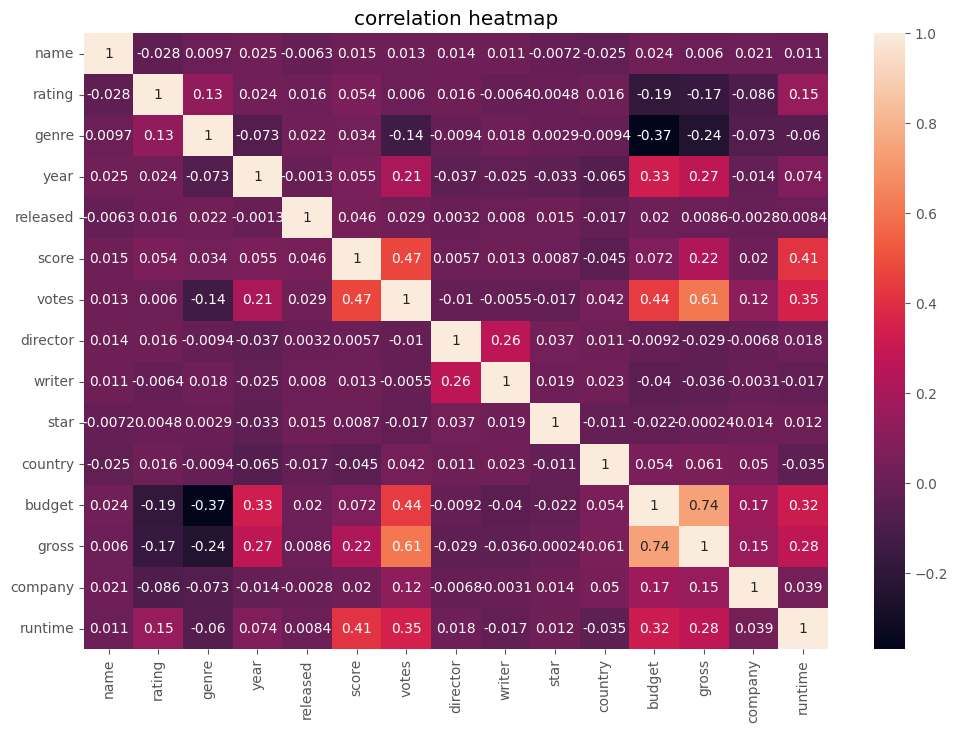

In [21]:
#its difficult to find value near 1 so we will create a heatmap
corr_matrix= df_numeric.corr(method= 'pearson')
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix , annot = True)
plt.title("correlation heatmap")

In [22]:
#here we can see that gross earning is highly correlated with budget and votes

In [23]:
corr_pairs= df_numeric.corr().unstack().sort_values()
corr_pairs

genre    budget    -0.368870
budget   genre     -0.368870
genre    gross     -0.244327
gross    genre     -0.244327
rating   budget    -0.185950
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [24]:
highly_corr= corr_pairs[(corr_pairs) > 0.5 ]
highly_corr

gross     votes       0.614858
votes     gross       0.614858
budget    gross       0.740364
gross     budget      0.740364
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [25]:
# here we can see also gross is highly corealted with votes and budget
